In [1]:
import numpy as np
import sounddevice as sd
import soundfile as sf
from numpy import ndarray
from collections import defaultdict
from shared.record_signal import convert_audio_to_numpy_array
import matplotlib.pyplot as plt

In [ ]:
# define global parameters
fs = 44100
nyquist = fs / 2.0
recording_count = 10
headphones = ['HD600', 'Beats_Detox', 'K601_001918']

In [ ]:
headphone_impulse_responses = defaultdict(dict)

for headphone in headphones:
    print(f"Headphone:\t {headphone}")

    for count in range(recording_count):
        impulse_response, fs = convert_audio_to_numpy_array(f"../sounds/impulse_responses/{headphone}/pass0{count}.wav")
        headphone_impulse_responses[headphone][count] = impulse_response
        
    headphone_impulse_responses[headphone]['fs'] = fs
    print(f'Sample Rate:\t {fs}')
    shape = headphone_impulse_responses[headphone][count].shape
    print(f'Shape:\t\t {shape}\n')

In [2]:
ir, fs = convert_audio_to_numpy_array(f'../sounds/impulse_responses/ir.wav')

In [7]:
def visualize_impulse_response(headphone: str, avg_impulse_response: ndarray):
    #y = avg_impulse_response.transpose()
    y = avg_impulse_response
    y_l = y[:, 0]
    y_r = y[:, 1]
    t_vec = np.arange(0, y_l.shape[0]) / fs


    fig, ((ax3, ax4)) = plt.subplots(1, 2, figsize=(19, 6), sharex='row', sharey='row')
    ax3.plot(t_vec, y_l)
    ax3.set_title("IR Left (zoomed in)")
    ax3.set_xlabel('Seconds')
    ax3.set_ylabel("Amplitude")

    ax4.plot(t_vec, y_r)
    ax4.set_title("IR Right (zoomed in)")
    ax4.set_xlabel('Duration (sec)')
    ax4.set_ylabel("Amplitude")

    ax3.set_xlim([0.0, 0.005])
    ax3.set_ylim([-0.3, 0.4])

    fig.suptitle(f'Impulse Response (IR) of {headphone}', fontsize=16)

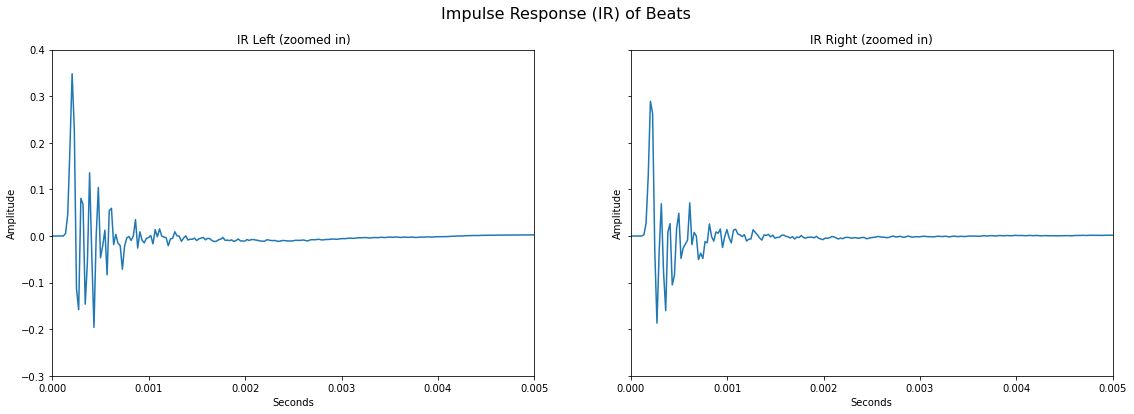

In [8]:
visualize_impulse_response('Beats', ir)

In [ ]:
for headphone in headphones:
    for count in range(recording_count):
        visualize_impulse_response(headphone, headphone_impulse_responses[headphone][count])

In [ ]:
for headphone in headphones:
    visualize_impulse_response(headphone, headphones_impulse_responses[headphone])